Importamos las librerías


In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
 



Creamos el dataset

In [4]:
df_bosque = pd.read_csv('covtype.data')
data = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

soil_type = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                      'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                      'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                      'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                      'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                      'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                      'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                      'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
wilderness_area = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']

for i in range(1, 5):
    col_nombre = f'Wilderness_Area{i}'
    data.append(col_nombre)
    wilderness_area.append(col_nombre)

for i in range(1, 41):
    col_nombre = f'Soil_Type{i}'
    data.append(col_nombre)
    soil_type.append(col_nombre)

data.append('Cover_Type')
df_bosque.columns = data

df_bosque



,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [105]:
data.shape

(581012, 55)

In [106]:
data['Soil_Type'] = data[['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                      'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                      'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                      'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                      'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                      'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                      'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                      'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']].sum(axis=1)

data['Wilderness_Area'] = data[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].sum(axis=1)
data = data.drop(columns=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                      'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                      'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                      'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                      'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                      'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                      'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                      'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])

data = data.drop(columns=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'])
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,5,1,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,1,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,1,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,1,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3,1,1
581008,2391,152,19,67,12,95,240,237,119,845,3,1,1
581009,2386,159,17,60,7,90,236,241,130,854,3,1,1
581010,2384,170,15,60,5,90,230,245,143,864,3,1,1


# Ejercicio 1

In [225]:

# Separar la variable objetivo del resto de variables
X = df_e1.drop('Cover_Type', axis=1)
y = df_e1['Cover_Type']

# Crear un modelo de árbol de decisión
d_arbol = DecisionTreeClassifier(random_state=100)

# Ajustar el modelo a los datos
d_arbol.fit(X, y)

# Obtener las importancias de cada variable
importancias = d_arbol.feature_importances_

# Crear una lista con las variables ordenadas por importancia
variables = X.columns.tolist()
variables_imp = list(zip(variables, importances))
variables_imp.sort(key=lambda x: x[1], reverse=True)

# Filtrar el DataFrame para quedarnos solamente con las variables necesarias
total_imp = 0
selected_variables = []
for variable, importance in variables_imp:
    total_imp += importance
    selected_variables.append(variable)
    if total_imp >= 0.95:
        break

df_reducida = df_e1[selected_variables + ['Cover_Type']]
df_reducida


,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Aspect,Hillshade_9am,Hillshade_3pm,Cover_Type
0,2596,510,6279,258,0,232,51,221,148,5
1,2590,390,6225,212,-6,235,56,220,151,5
2,2804,3180,6121,268,65,238,139,234,135,2
3,2785,3090,6211,242,118,238,155,238,122,2
4,2595,391,6172,153,-1,234,45,220,150,5
...,...,...,...,...,...,...,...,...,...,...
581007,2396,108,837,85,17,237,153,240,118,3
581008,2391,95,845,67,12,237,152,240,119,3
581009,2386,90,854,60,7,241,159,236,130,3
581010,2384,90,864,60,5,245,170,230,143,3


## EJERCICIO 2

Después de filtrar el dataset vamos a plantear un problema de clasificación para conseguir un clasificador de la cubierta forestal en basea a las variables cartográficas.:

2.1 Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.

2.2 Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de 0 a 1
- Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1

In [ ]:
# IMPORTAR LIBRERÍAS NECESARIAS
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
# 2.1
df_forestCovtype2.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [ ]:
# 2.2
# IMPORTAR LIBRERÍAS NECESARIAS
from sklearn.preprocessing import LabelEncoder

In [ ]:
etiquetado = LabelEncoder()
etiquetado.fit(df_forestCovtype2["Cover_Type"])

In [ ]:
etiquetado.classes_

In [ ]:
df_forestCovtype2["Cover_Type_Num"] = etiquetado.transform(df_forestCovtype2["Cover_Type"])
df_forestCovtype2.groupby(["Cover_Type", "Cover_Type_Num"]).count()

df_forestCovtype3 = df_forestCovtype2.drop("Cover_Type", axis = "columns")

pd.DataFrame(df_forestCovtype3)

# Ejericio 3

3.1

In [128]:
from sklearn.model_selection import train_test_split

X = data_scaled.drop(columns=['Cover_Type'])
y = data_scaled['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [129]:
X_test.to_csv("X_test.csv", index = False)
y_test.to_csv("y_test.csv", index = False)

In [130]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

3.2

In [131]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression(max_iter= 1000, random_state=100)

3.3

In [132]:
log_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=100)

In [119]:
y_pred = log_r.predict(X_test)

In [120]:
print(y_pred)

[2 2 1 ... 3 2 2]


In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6853953856612996

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.67      0.70      0.68     42446
           2       0.71      0.80      0.75     56592
           3       0.63      0.65      0.64      7133
           4       0.52      0.23      0.32       571
           5       0.00      0.00      0.00      1847
           6       0.31      0.02      0.03      3456
           7       0.45      0.03      0.05      4158

    accuracy                           0.69    116203
   macro avg       0.47      0.34      0.35    116203
weighted avg       0.65      0.69      0.66    116203



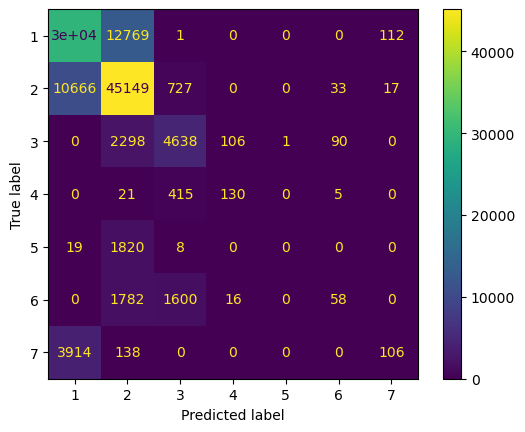

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cua = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=log_r.classes_)
cua.plot()

plt.show()

In [124]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.6575461299603805

### Ejercicio 4:
Ahora probamos la creación de otros modelo basados en árboles de decisión:

4.1 Entrena un modelo tipo Decision Tree Classifire y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:

- random_state=100
- Accuracy
- F1-score (average='weighted')
- Classification report (zero_division=0)

4.2 Saca la curva de complejidad del modelo Decision Tree (Model Complexity Curve) y crea un nuevo clasificador con el valor óptimo de la profundidad del árbol según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.

- random_state=100
- rango de profundidades: de 2 a 30 inclusive

4.3 Saca la gráfica de el Learning Curve para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.

- random_state=100
- (Sugerencia: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de 1000 muestras para el modelo).